# Session #2 Homework

## Dataset

In this homework, we will use the New York City Airbnb Open Data. You can take it from <a href='https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv'>Kaggle</a> or download from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'>here</a> if you don't want to sign up to Kaggle.

The goal of this homework is to create a regression model for prediction apartment prices (column `'price'`).

## EDA

* Load the data.
* Look at the price variable. Does it have a long tail?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

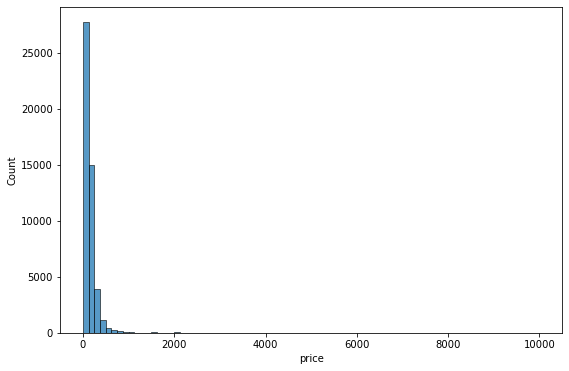

In [5]:
plt.figure(figsize=(9, 6))
sns.histplot(df.price, bins=80);

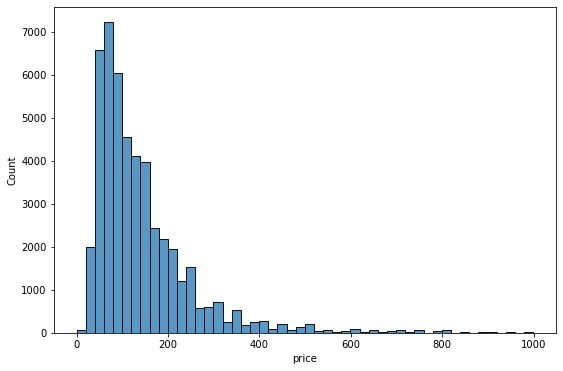

In [6]:
plt.figure(figsize=(9, 6))
sns.histplot(df.price[df.price < 1000], bins=50);

Yes, seems like the price variable has a long tail.

## Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them.

In [7]:
features = [
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

In [8]:
df = df[features]
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


## Question 1

Find a feature with missing values. How many missing values does it have?

In [9]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Question 2

What's the median (50% percentile) for variable `'minimum_nights'`?

df.describe().T

In [10]:
df['minimum_nights'].median()

3.0

## Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value (`'price'`) is not in your dataframe.
* Apply the log transformation to the price variable using the `np.log1p()` function.

In [11]:
SEED = 42

In [12]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test)

assert n == (n_train + n_val + n_test)

48895 29337 9779 9779


In [13]:
idx = np.arange(n)

In [14]:
np.random.seed(seed=SEED)
np.random.shuffle(idx)

In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [16]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [17]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,89,3,62,0.71,1,189
1,40.70666,-73.90779,30,21,0,NaN,1,73
2,40.76116,-73.99016,120,2,17,0.43,1,0
3,40.70763,-74.01050,470,2,5,1.88,327,272
4,40.79658,-73.93287,199,2,30,0.80,1,30


In [20]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [21]:
del df_train['price'], df_val['price'], df_test['price']

In [22]:
df_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,NaN,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30


In [23]:
y_train

array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
       3.8286414 ])

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`.
* Which option gives better RMSE?

In [24]:
base = list(df_train.columns.values)
base

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [25]:
def prepare_X(df, value=0):
    df_num = df[base]
    df_num = df_num.fillna(value)
    X = df_num.values
    return X

In [26]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [27]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

First, try to fill missing values with zeros.

In [28]:
df_train.isnull().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [29]:
X_train = prepare_X(df_train, 0)

In [30]:
X_train.shape

(29337, 7)

In [31]:
w0, w = train_linear_regression(X_train, y_train)

In [32]:
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
score_zero = rmse(y_val, y_pred)
round(score_zero, 2)

0.64

Now, let's try to fill it with mean value of this variabl.

In [33]:
mean_val = df_train['reviews_per_month'].mean()
mean_val

1.3685492094776983

In [34]:
X_train = prepare_X(df_train, mean_val)
w0, w = train_linear_regression(X_train, y_train)

In [35]:
X_val = prepare_X(df_val, mean_val)
y_pred = w0 + X_val.dot(w)
score_mean = rmse(y_val, y_pred)
round(score_mean, 2)

0.64

They are equal with such kind of precision.

## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [36]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [37]:
scores = {}
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores[r] = round(score, 2)
    
    print(f'r={r}: w0={w0}, rmse={score}')

r=0: w0=-419.91265863459563, rmse=0.6430337788649609
r=1e-06: w0=-419.86271586621507, rmse=0.6430341157340052
r=0.0001: w0=-414.97649263761593, rmse=0.6430723153643709
r=0.001: w0=-375.27365275360376, rmse=0.6437669735254038
r=0.01: w0=-191.78384053419808, rmse=0.6557528427434279
r=0.1: w0=-32.56256054996282, rmse=0.6773299642450078
r=1: w0=-3.4992168360568994, rmse=0.6823116950157346
r=5: w0=-0.7033623167239721, rmse=0.6827915727845701
r=10: w0=-0.3512767588949242, rmse=0.6828430212099271


In [38]:
scores

{0: 0.64,
 1e-06: 0.64,
 0.0001: 0.64,
 0.001: 0.64,
 0.01: 0.66,
 0.1: 0.68,
 1: 0.68,
 5: 0.68,
 10: 0.68}

In [39]:
print(f'The smallest r is {min(scores, key=scores.get)}.')

The smallest r is 0.


## Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

In [40]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [41]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed=seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    
    del df_train['price'], df_val['price'], df_test['price']
    
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f'seed={seed}: w0={w0}, rmse={score}')
    scores.append(score)

std = np.std(scores)
print(f'std = {round(std, 3)}')

seed=0: w0=-427.62844626626065, rmse=0.6549779961248613
seed=1: w0=-414.70554910891815, rmse=0.6462523685844072
seed=2: w0=-423.25413365944166, rmse=0.6476558177376243
seed=3: w0=-421.8933158935208, rmse=0.6375145070438151
seed=4: w0=-422.0609909896383, rmse=0.6445809083258727
seed=5: w0=-429.178752317333, rmse=0.6305809996849548
seed=6: w0=-427.4918955501337, rmse=0.629785191745815
seed=7: w0=-428.18846990339546, rmse=0.6506184267134921
seed=8: w0=-427.69291185977454, rmse=0.6489780353719417
seed=9: w0=-426.9826895634907, rmse=0.6437565168202272
std = 0.008


## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`.
* What's the RMSE on the test dataset?

In [42]:
SEED = 9

In [43]:
idx = np.arange(n)
np.random.seed(seed=SEED)
np.random.shuffle(idx)
    
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
    
del df_train['price'], df_val['price'], df_test['price']

In [44]:
df_full_train = pd.concat([df_train, df_val])

In [45]:
df_full_train = df_full_train.reset_index(drop=True)

In [46]:
X_full_train = prepare_X(df_full_train, 0)

In [47]:
y_full_train = np.concatenate([y_train, y_val])

In [48]:
X_full_train

array([[ 4.070423e+01, -7.391595e+01,  1.000000e+00, ...,  1.300000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.077115e+01, -7.392275e+01,  4.000000e+01, ...,  2.700000e-01,
         1.000000e+00,  2.070000e+02],
       [ 4.070401e+01, -7.400932e+01,  2.900000e+01, ...,  0.000000e+00,
         9.600000e+01,  1.000000e+00],
       ...,
       [ 4.072982e+01, -7.398593e+01,  2.000000e+00, ...,  1.100000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.071969e+01, -7.395620e+01,  1.000000e+00, ...,  2.000000e-02,
         1.000000e+00,  0.000000e+00],
       [ 4.066949e+01, -7.392172e+01,  1.000000e+00, ...,  1.910000e+00,
         2.000000e+00,  3.230000e+02]])

In [49]:
y_full_train

array([4.33073334, 4.24849524, 5.19295685, ..., 4.94875989, 5.37527841,
       4.18965474])

In [50]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [51]:
X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(f'RMSE_test = {round(score, 2)}')

RMSE_test = 0.65
